# Import data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
os.chdir('..')
path = !pwd
path = path[0]
path

'/home/manos/git/radiomics-features-extraction'

## Selected features

In [3]:
selected_features = pd.read_excel(os.path.join(path,'info','info.xlsx'), usecols='B', skiprows=[36,37,38,39])
selected_features = selected_features.dropna().values.flatten()
selected_features

array(['volume (voxel counting)', 'Sphericity', 'Surface area (mesh)',
       'Discretised intensity skewness', 'Minimum Intensity',
       'Mean Intensity', 'Maximum Intensity', 'Kurtosis',
       'CLCM correlation', 'GLCM contrast', 'GLCM angular second moment',
       'GLCM joint entropy', 'GLCM difference average',
       'GLCM inverse difference', 'NGTDM coarseness', 'NGTDM contrast',
       'NGTDM busyness', 'GLRLM Short Run Emphasis',
       'GLRLM Long Run Emphasis', 'GLRLM Low Gray Level Run Emphasis',
       'GLRLM High Gray Level Run Emphasis',
       'GLRLM Short Run Low Gray Level Emphasis',
       'GLRLM Short Run High Gray Level Emphasis',
       'GLRLM Long Run Low Gray Level Emphasis',
       'GLRLM Long Run High Gray Level Emphasis',
       'GLRLM Gray Level Non Uniformity',
       'GLRLM Run Length Non Uniformity', 'GLRLM Run Percentage',
       'Δεν βρέθηκε', 'Μεγάλη απόκλιση τιμών'], dtype=object)

## LifeX dataset

In [4]:
lifex_selected_features = pd.read_excel(os.path.join(path,'info','info.xlsx'), usecols='C')
lifex_selected_features = lifex_selected_features.dropna().values.flatten()

lifex_dataset = pd.read_csv(os.path.join(path, 'test_image_files', 'test_image_lifex_extracted_features.csv'), skiprows=2)
lifex_dataset = lifex_dataset[lifex_selected_features]
lifex_dataset

,SHAPE_Volume(vx),SHAPE_Sphericity[onlyFor3DROI]),SHAPE_Surface(mm2)[onlyFor3DROI],CONVENTIONAL_Skewness,CONVENTIONAL_min,CONVENTIONAL_mean,CONVENTIONAL_max,CONVENTIONAL_Kurtosis,GLCM_Correlation,GLCM_Contrast[=Variance],...,GLRLM_LRE,GLRLM_LGRE,GLRLM_HGRE,GLRLM_SRLGE,GLRLM_SRHGE,GLRLM_LRLGE,GLRLM_LRHGE,GLRLM_GLNU,GLRLM_RLNU,GLRLM_RP
0,211439,0,0,-0.79593,0,170.537174,255,2.773942,0.989783,0.168618,...,679.469489,0.052152,89.625557,0.019866,45.979686,56.485177,48961.596059,3043.701238,2612.574843,0.067891


## Pyradiomics dataset

In [5]:
pyradiomics_selected_features = pd.read_excel(os.path.join(path,'info','info.xlsx'), usecols='D')
pyradiomics_selected_features = pyradiomics_selected_features.dropna().values.flatten()

pyradiomics_dataset = pd.read_csv(os.path.join(path, 'test_image_files', 'test_image_pyradiomics_extracted_features.csv'), skiprows=2)
pyradiomics_dataset = pyradiomics_dataset[pyradiomics_selected_features]
pyradiomics_dataset

,original_shape_VoxelVolume,original_shape_Sphericity,original_shape_SurfaceArea,original_firstorder_Skewness,original_firstorder_Minimum,original_firstorder_Mean,original_firstorder_Maximum,original_firstorder_Kurtosis,original_glcm_Correlation,original_glcm_Contrast,...,original_glrlm_LongRunEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_gldm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage
0,211439,0.040465,423668.775437,-0.79593,0,170.537174,255,2.773942,0.988943,0.15301,...,1215.447699,0.081005,61.787081,0.028117,6.740983,99.823252,73697.991337,25794.738497,398.813814,0.042309


## MaZda dataset

In [25]:
mazda_selected_features = pd.read_excel(os.path.join(path,'info','info.xlsx'), usecols='E')
mazda_selected_features = mazda_selected_features.dropna().values.flatten()
mazda_selected_features

array([0, 0, 0, 'Skewness', 0, 'Mean', 0, 'Kurtosis', 'Correlat',
       'Contrast', 'AngScMom', 'Entropy', 0, 'InvDfMom', 0, 0, 0,
       'ShrtREmp', 'LngREmph', 0, 0, 0, 0, 0, 0, 'GLevNonU', 'RLNonUni',
       0], dtype=object)

In [26]:
mazda_first_order_selected_features =  ['Skewness', 'Mean', 'Kurtosis']

mazda_glcm_selected_features = np.array([
 ['S(1,0)AngScMom','S(1,0)Contrast','S(1,0)Correlat','S(1,0)InvDfMom','S(1,0)Entropy'],
 ['S(0,1)AngScMom','S(0,1)Contrast','S(0,1)Correlat','S(0,1)InvDfMom','S(0,1)Entropy'],
 ['S(1,1)AngScMom','S(1,1)Contrast','S(1,1)Correlat','S(1,1)InvDfMom','S(1,1)Entropy'],
 ['S(1,-1)AngScMom','S(1,-1)Contrast','S(1,-1)Correlat','S(1,-1)InvDfMom','S(1,-1)Entropy'],
 ['S(2,0)AngScMom','S(2,0)Contrast','S(2,0)Correlat','S(2,0)InvDfMom','S(2,0)Entropy'],
 ['S(0,2)AngScMom','S(0,2)Contrast','S(0,2)Correlat','S(0,2)InvDfMom','S(0,2)Entropy'],
 ['S(2,2)AngScMom','S(2,2)Contrast','S(2,2)Correlat','S(2,2)InvDfMom','S(2,2)Entropy'],
 ['S(2,-2)AngScMom','S(2,-2)Contrast','S(2,-2)Correlat','S(2,-2)InvDfMom','S(2,-2)Entropy'],
 ['S(3,0)AngScMom','S(3,0)Contrast','S(3,0)Correlat','S(3,0)InvDfMom','S(3,0)Entropy'],
 ['S(0,3)AngScMom','S(0,3)Contrast','S(0,3)Correlat','S(0,3)InvDfMom','S(0,3)Entropy'],
 ['S(3,3)AngScMom','S(3,3)Contrast','S(3,3)Correlat','S(3,3)InvDfMom','S(3,3)Entropy'],
 ['S(3,-3)AngScMom','S(3,-3)Contrast','S(3,-3)Correlat','S(3,-3)InvDfMom','S(3,-3)Entropy'],
 ['S(4,0)AngScMom','S(4,0)Contrast','S(4,0)Correlat','S(4,0)InvDfMom','S(4,0)Entropy'],
 ['S(0,4)AngScMom','S(0,4)Contrast','S(0,4)Correlat','S(0,4)InvDfMom','S(0,4)Entropy'],
 ['S(4,4)AngScMom','S(4,4)Contrast','S(4,4)Correlat','S(4,4)InvDfMom','S(4,4)Entropy'],
 ['S(4,-4)AngScMom','S(4,-4)Contrast','S(4,-4)Correlat','S(4,-4)InvDfMom','S(4,-4)Entropy'],
 ['S(5,0)AngScMom','S(5,0)Contrast','S(5,0)Correlat','S(5,0)InvDfMom','S(5,0)Entropy'],
 ['S(0,5)AngScMom','S(0,5)Contrast','S(0,5)Correlat','S(0,5)InvDfMom','S(0,5)Entropy'],
 ['S(5,5)AngScMom','S(5,5)Contrast','S(5,5)Correlat','S(5,5)InvDfMom','S(5,5)Entropy'],
 ['S(5,-5)AngScMom','S(5,-5)Contrast','S(5,-5)Correlat','S(5,-5)InvDfMom','S(5,-5)Entropy'],
]).T

mazda_glrlm_selected_features = [
 'Horzl_RLNonUni', 'Horzl_GLevNonU', 'Horzl_LngREmph', 'Horzl_ShrtREmp',
 'Vertl_RLNonUni', 'Vertl_GLevNonU', 'Vertl_LngREmph', 'Vertl_ShrtREmp',
]


In [27]:
mazda_dataset = pd.read_csv(os.path.join(path, 'test_image_files', 'test_image_mazda_extracted_features.csv'), skiprows=19)
mazda_dataset.drop(axis=1, labels=mazda_dataset.columns[2:], inplace=True)
mazda_dataset = mazda_dataset.T
mazda_dataset.reset_index(inplace=True)

new_header = mazda_dataset.iloc[0] #grab the first row for the header
mazda_dataset = mazda_dataset[1:] #take the data less the header row
mazda_dataset.columns = new_header #set the header row as the df header

mazda_dataset.index = np.arange(0, len(mazda_dataset))

mazda_first_order_dataset = mazda_dataset[mazda_first_order_selected_features]
mazda_first_order_dataset

,Skewness,Mean,Kurtosis
0,-0.79372,21953.7,-0.229298


### Refactor glrlm values 

In [28]:
values = []
columns = []

for i in range(4):
    horizl_value = float(mazda_dataset[mazda_glrlm_selected_features[i]])
    vertl_value = float(mazda_dataset[mazda_glrlm_selected_features[i+4]])
    
    new_col_name = mazda_glrlm_selected_features[i].split('_')[1]
    aggregated_value = (horizl_value + vertl_value) / 2
    
    columns.append(new_col_name)
    values.append(aggregated_value)
    
mazda_glrlm_dataset = pd.DataFrame(values, columns)
mazda_glrlm_dataset = mazda_glrlm_dataset.T
mazda_glrlm_dataset

,RLNonUni,GLevNonU,LngREmph,ShrtREmp
0,4611.16485,697.366745,94.83782,0.119138


### Refactor glcm values

In [29]:
columns = ['Correlat','Contrast','AngScMom','Entropy','InvDfMom']
values = []
correlat_values = []
contrast_values = []
angScMom_values = []
entropy_values = []
invDfMom_values = []

for i in range(mazda_glcm_selected_features.shape[0]):
    correlat_values.append(mazda_dataset[mazda_glcm_selected_features[i][2]].values[0])
values.append(np.mean(correlat_values))
  
for i in range(mazda_glcm_selected_features.shape[0]):
    contrast_values.append(mazda_dataset[mazda_glcm_selected_features[i][1]].values[0])
values.append(np.mean(contrast_values))
     
for i in range(mazda_glcm_selected_features.shape[0]):
    angScMom_values.append(mazda_dataset[mazda_glcm_selected_features[i][0]].values[0])
values.append(np.mean(angScMom_values))
    
for i in range(mazda_glcm_selected_features.shape[0]):
    entropy_values.append(mazda_dataset[mazda_glcm_selected_features[i][4]].values[0])
values.append(np.mean(entropy_values))
    
for i in range(mazda_glcm_selected_features.shape[0]):
    invDfMom_values.append(mazda_dataset[mazda_glcm_selected_features[i][3]].values[0])
values.append(np.mean(invDfMom_values))

mazda_glcm_dataset = pd.DataFrame(values, columns)
mazda_glcm_dataset = mazda_glcm_dataset.T
mazda_glcm_dataset

,Correlat,Contrast,AngScMom,Entropy,InvDfMom
0,1.647078,1.343447,1.262431,1.579483,1.394315


In [30]:
mazda_dataset = pd.concat([mazda_first_order_dataset, mazda_glcm_dataset, mazda_glrlm_dataset], axis=1)
mazda_dataset

,Skewness,Mean,Kurtosis,Correlat,Contrast,AngScMom,Entropy,InvDfMom,RLNonUni,GLevNonU,LngREmph,ShrtREmp
0,-0.79372,21953.7,-0.229298,1.647078,1.343447,1.262431,1.579483,1.394315,4611.16485,697.366745,94.83782,0.119138


In [31]:
mazda_dataset.insert(loc=0, column='volume (voxel counting)', value=0)
mazda_dataset.insert(loc=1, column='Sphericity', value=0)
mazda_dataset.insert(loc=2, column='Surface area (mesh)', value=0)
mazda_dataset.insert(loc=4, column='Minimum Intensity', value=0)
mazda_dataset.insert(loc=6, column='Maximum Intensity', value=0)
mazda_dataset.insert(loc=12, column='GLCM difference average', value=0)
mazda_dataset.insert(loc=14, column='NGTDM coarseness', value=0)
mazda_dataset.insert(loc=15, column='NGTDM contrast', value=0)
mazda_dataset.insert(loc=16, column='NGTDM busyness', value=0)
mazda_dataset.insert(loc=19, column='GLRLM Low Gray Level Run Emphasis', value=0)
mazda_dataset.insert(loc=20, column='GLRLM High Gray Level Run Emphasis', value=0)
mazda_dataset.insert(loc=21, column='GLRLM Short Run Low Gray Level Emphasis', value=0)
mazda_dataset.insert(loc=22, column='GLRLM Short Run High Gray Level Emphasis', value=0)
mazda_dataset.insert(loc=23, column='GLRLM Long Run Low Gray Level Emphasis', value=0)
mazda_dataset.insert(loc=24, column='GLRLM Long Run High Gray Level Emphasis', value=0)
mazda_dataset.insert(loc=27, column='GLRLM Run Percentage', value=0)

mazda_dataset

,volume (voxel counting),Sphericity,Surface area (mesh),Skewness,Minimum Intensity,Mean,Maximum Intensity,Kurtosis,Correlat,Contrast,...,GLevNonU,GLRLM Low Gray Level Run Emphasis,GLRLM High Gray Level Run Emphasis,GLRLM Short Run Low Gray Level Emphasis,GLRLM Short Run High Gray Level Emphasis,GLRLM Long Run Low Gray Level Emphasis,GLRLM Long Run High Gray Level Emphasis,LngREmph,ShrtREmp,GLRLM Run Percentage
0,0,0,0,-0.79372,0,21953.7,0,-0.229298,1.647078,1.343447,...,697.366745,0,0,0,0,0,0,94.83782,0.119138,0


# Diversities between softwares

IndexError: single positional indexer is out-of-bounds

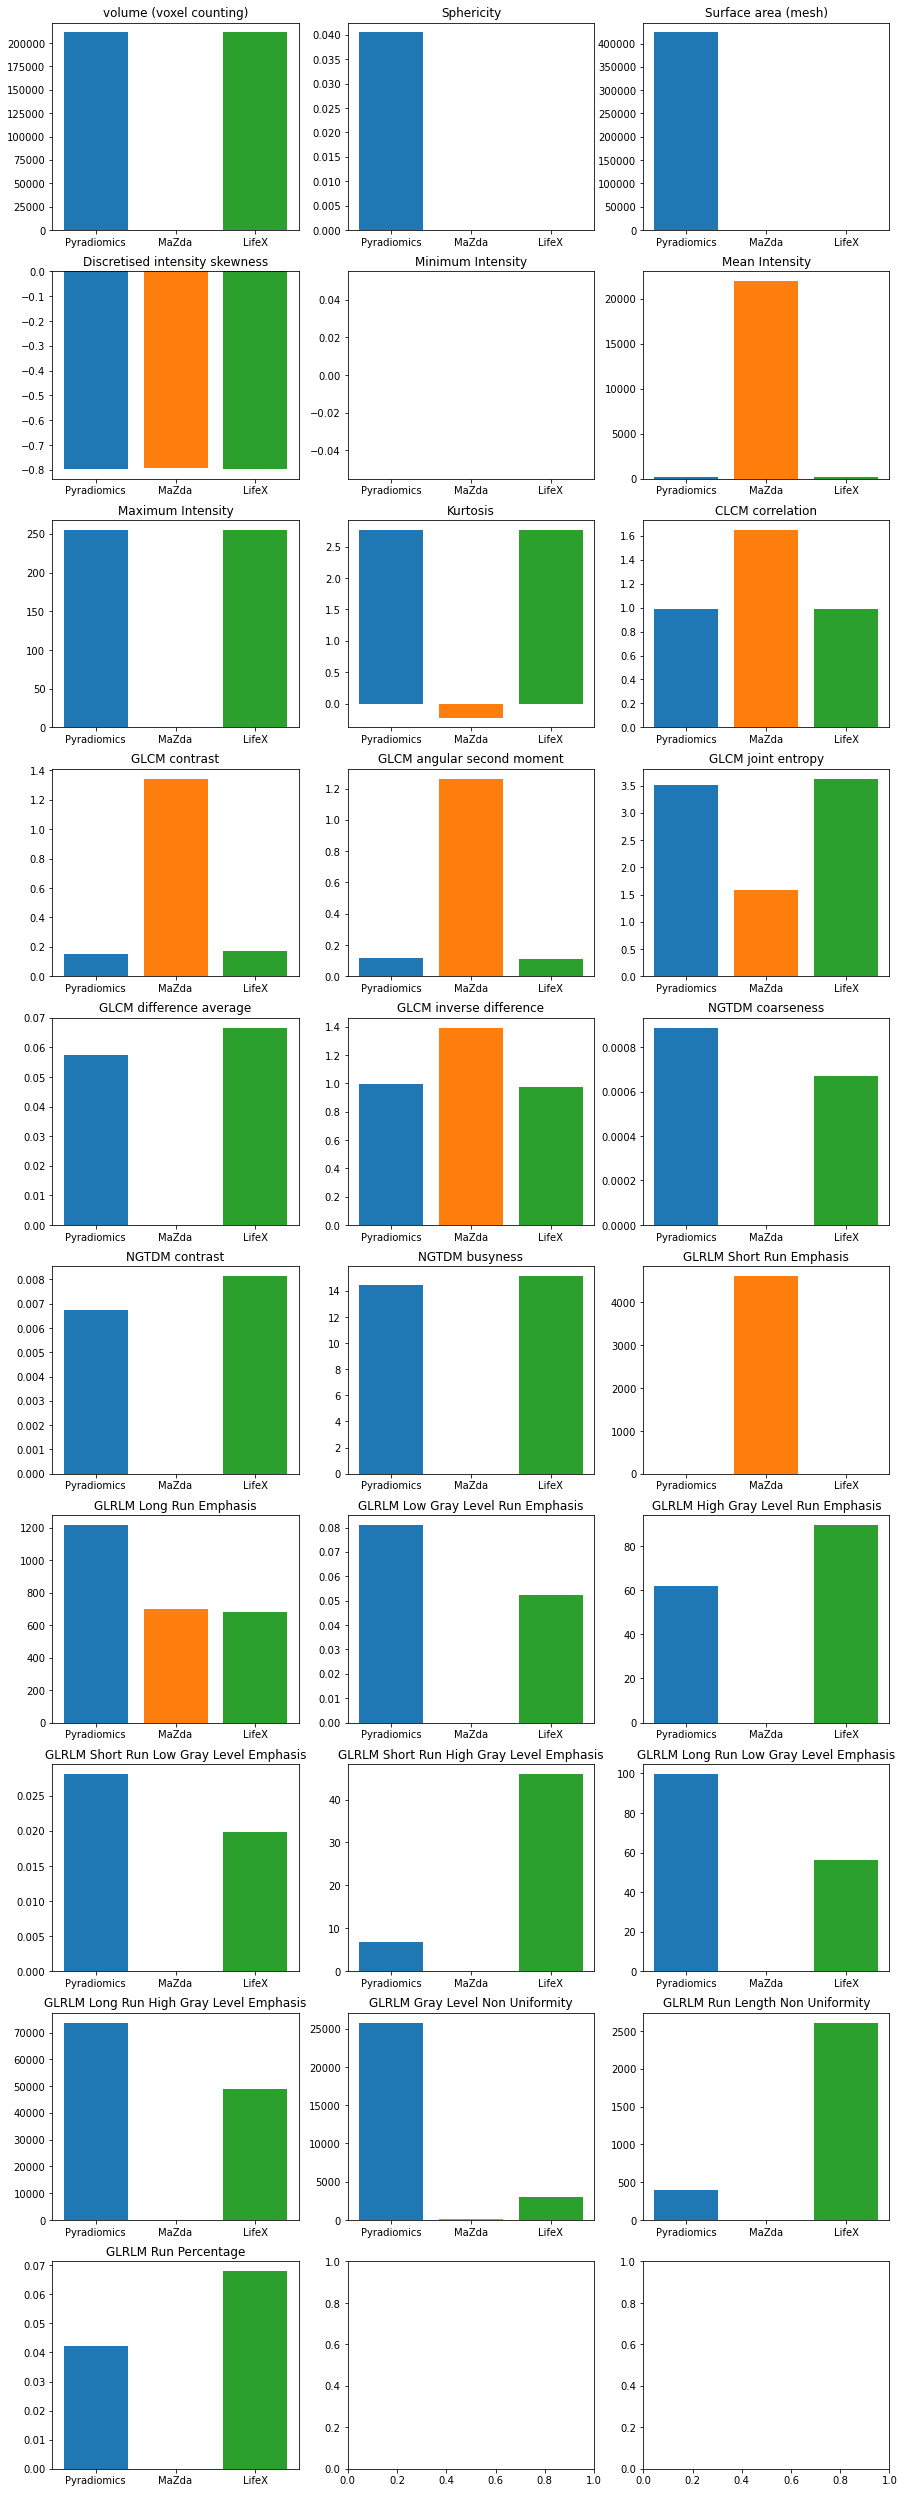

In [32]:
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(15, 45))

for i, (ax, feature) in enumerate(zip(axs.flat, selected_features)):
    ax.bar('Pyradiomics', pyradiomics_dataset.iloc[:,i])
    ax.bar('MaZda', mazda_dataset.iloc[:,i])
    ax.bar('LifeX', lifex_dataset.iloc[:,i])
    ax.set_title(selected_features[i])

plt.tight_layout()
plt.show()